In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [80]:
df = pd.read_csv('Data_LAB.csv')
df = df.head(1000000)
#df = pd.read_csv('/home/alejandro/Documentos/Data_LAB.csv')
X = df[['L','a','b']].values
y = df['class'].values

In [81]:
# Convertimos las etiquetas a valores numéricos
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['class'].values)

In [82]:
# Verificar la forma de las etiquetas
print("Forma original de y_encoded:", y_encoded.shape)

Forma original de y_encoded: (1000000,)


In [83]:
# Aseguramos que las etiquetas estén codificadas como one-hot
y_categorical = to_categorical(y_encoded, num_classes=3)  # num_classes=3 para garantizar que haya 3 clases

In [84]:
# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['L', 'a', 'b']].values)

In [85]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)

In [87]:
X_train.shape

(800000, 3)

In [88]:
# Construcción del modelo de red neuronal
model = Sequential()

# Capa de entrada con 3 neuronas (una por cada característica), y una capa oculta con 10 neuronas
model.add(Dense(10, input_dim=3, activation='relu'))

# Otra capa oculta con 10 neuronas
model.add(Dense(10, activation='relu'))

# Capa de salida con 3 neuronas (una por cada clase) y softmax para clasificación multiclase
model.add(Dense(3, activation='softmax'))

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/home/alejandro/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [89]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 10)             │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183 (732.00 B)

 Trainable params: 183 (732.00 B)

 Non-trainable params: 0 (0.00 B)

In [90]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_data=(X_test, y_test), verbose=1)

Epoch 1/10
80000/80000 ━━━━━━━━━━━━━━━━━━━━ 145s 2ms/step - accuracy: 0.8284 - loss: 0.4247 - val_accuracy: 0.8338 - val_loss: 0.4074
Epoch 2/10
80000/80000 ━━━━━━━━━━━━━━━━━━━━ 147s 2ms/step - accuracy: 0.8339 - loss: 0.4045 - val_accuracy: 0.8345 - val_loss: 0.4028
Epoch 3/10
80000/80000 ━━━━━━━━━━━━━━━━━━━━ 134s 2ms/step - accuracy: 0.8338 - loss: 0.4042 - val_accuracy: 0.8344 - val_loss: 0.4024
Epoch 4/10
80000/80000 ━━━━━━━━━━━━━━━━━━━━ 132s 2ms/step - accuracy: 0.8346 - loss: 0.4038 - val_accuracy: 0.8349 - val_loss: 0.4020
Epoch 5/10
80000/80000 ━━━━━━━━━━━━━━━━━━━━ 136s 2ms/step - accuracy: 0.8348 - loss: 0.4027 - val_accuracy: 0.8352 - val_loss: 0.4029
Epoch 6/10
80000/80000 ━━━━━━━━━━━━━━━━━━━━ 136s 2ms/step - accuracy: 0.8346 - loss: 0.4031 - val_accuracy: 0.8352 - val_loss: 0.4018
Epoch 7/10
80000/80000 ━━━━━━━━━━━━━━━━━━━━ 138s 2ms/step - accuracy: 0.8346 - loss: 0.4037 - val_accuracy: 0.8355 - val_loss: 0.4026
Epoch 8/10
80000/80000 ━━━━━━━━━━━━━━━━━━━━ 142s 2ms/step - ac

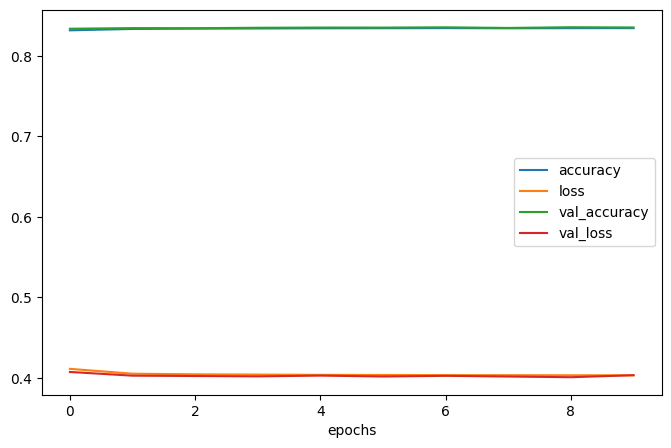

In [91]:
history_model = history.history

pd.DataFrame(history_model).plot(figsize=(8,5))
plt.xlabel('epochs')
#plt.ylabel('accuracy / loss')
plt.show()

In [93]:
df1 = pd.read_csv('Data_LABtest.csv')
X_new = df1[['L', 'a', 'b']].values
y_true = df1['class'].values

In [94]:
X_new_scaled = scaler.fit_transform(X_new)

In [95]:
# Hacer predicciones con el modelo entrenado
predictions = model.predict(X_new_scaled)

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


In [96]:
# Convertir las predicciones a etiquetas de clase
predicted_classes = np.argmax(predictions, axis=1)

In [97]:
# Convertir los números de clase a etiquetas originales (e.g., 'glob', 'crom', 'cito')
predicted_labels = label_encoder.inverse_transform(predicted_classes)

In [102]:
# Generar el reporte de clasificación con todas las métricas (precisión, recall, F1-score, etc.)
print("Reporte de Clasificación:")
print(classification_report(y_true, predicted_labels, target_names=label_encoder.classes_))

Reporte de Clasificación:
              precision    recall  f1-score   support

        cito       0.63      0.35      0.45     23179
        crom       0.78      0.78      0.78      4193
        glob       0.83      0.95      0.88     72628

    accuracy                           0.80    100000
   macro avg       0.75      0.69      0.70    100000
weighted avg       0.78      0.80      0.78    100000



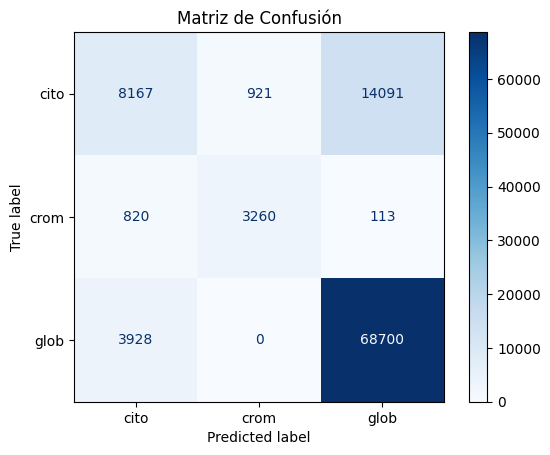

In [103]:
# Generar la matriz de confusión
cm = confusion_matrix(y_true, predicted_labels, labels=label_encoder.classes_)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()